<a href="https://colab.research.google.com/github/pragy19/StressDetection/blob/main/stress_dt.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn.preprocessing import StandardScaler
from sklearn.tree import DecisionTreeClassifier
import seaborn as sns
import matplotlib.pyplot as plt
import time

In [ ]:
# Step 1: Load Old & New Datasets
train_data = pd.read_csv("/content/drive/MyDrive/Colab Notebooks/stress/train.csv")
test_data = pd.read_csv("/content/drive/MyDrive/Colab Notebooks/stress/test.csv")  # Test1


In [ ]:
core_features = ['MEAN_RR', 'SDRR', 'RMSSD', 'HR', 'pNN25', 'pNN50']
# Select only core features
X_train = train_data[core_features]
y_train = train_data['condition']

X_test = test_data[core_features]
y_test = test_data['condition']

In [ ]:
# Scale the selected features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [ ]:
# Create and train DecisionTreeClassifier
clf = DecisionTreeClassifier(max_depth=5, min_samples_split=20,
                             min_samples_leaf=10, random_state=42, class_weight='balanced')

clf.fit(X_train_scaled, y_train)

DecisionTreeClassifier(class_weight='balanced', max_depth=5,
                       min_samples_leaf=10, min_samples_split=20,
                       random_state=42)

In [ ]:
# Evaluate model
train_accuracy = clf.score(X_train_scaled, y_train)
test_accuracy = clf.score(X_test_scaled, y_test)

print(f"Training Accuracy: {train_accuracy * 100:.2f}%")
print(f"Test Accuracy: {test_accuracy * 100:.2f}%")


Training Accuracy: 60.61%
Test Accuracy: 60.94%


In [ ]:
# Make predictions
predictions = clf.predict(X_test_scaled)



Test Accuracy: 60.94%

Classification Report:
               precision    recall  f1-score   support

 interruption       0.59      0.69      0.63     11782
    no stress       0.90      0.49      0.64     22158
time pressure       0.40      0.84      0.54      7093

     accuracy                           0.61     41033
    macro avg       0.63      0.67      0.60     41033
 weighted avg       0.72      0.61      0.62     41033



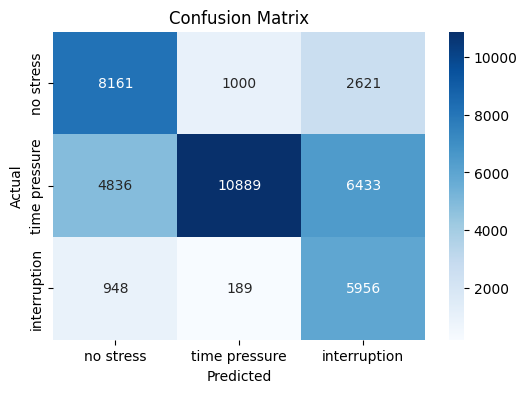

In [ ]:
# Accuracy and classification report
accuracy = accuracy_score(y_test, predictions)
print(f"\nTest Accuracy: {accuracy * 100:.2f}%")
print("\nClassification Report:")
print(classification_report(y_test, predictions, zero_division=1))

# Confusion matrix
conf_matrix = confusion_matrix(y_test, predictions)

# Plot confusion matrix
plt.figure(figsize=(6, 4))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues',
            xticklabels=['no stress', 'time pressure', 'interruption'],
            yticklabels=['no stress', 'time pressure', 'interruption'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()